### Task : Multiple Regression -> Stochastic Gradient Descent
#### Input (Predictor Variable(s)) : age, sex, bmi, bp, s1, s2, s3, s4, s5, s6 (10)
#### Output (Response Variable(s)) : Quantitative Measure of Disease Progression

### Importing the necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets, metrics, preprocessing, model_selection, pipeline

### Collecting, Analyzing and Visualizing the data

In [2]:
data = datasets.load_diabetes()
print(dir(data))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Converting data into a data frame (for analysis)

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
df['sex_label'] = pd.cut(df['sex'], bins = [-1, 0, 1], labels = ['Male', 'Female'])

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,sex_label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,Female
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,Male
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,Female
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,Male
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,Male


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        442 non-null    float64 
 1   sex        442 non-null    float64 
 2   bmi        442 non-null    float64 
 3   bp         442 non-null    float64 
 4   s1         442 non-null    float64 
 5   s2         442 non-null    float64 
 6   s3         442 non-null    float64 
 7   s4         442 non-null    float64 
 8   s5         442 non-null    float64 
 9   s6         442 non-null    float64 
 10  target     442 non-null    float64 
 11  sex_label  442 non-null    category
dtypes: category(1), float64(11)
memory usage: 38.7 KB


In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [8]:
# Correlation Matrix (Pearson Correlation Co-efficient)

corr_matrix = df.corr()
corr_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [9]:
corr_matrix_ = corr_matrix['target'].sort_values(ascending = False)
corr_matrix_

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

In [10]:
num_attr = np.array(corr_matrix.keys())
target = 'target'

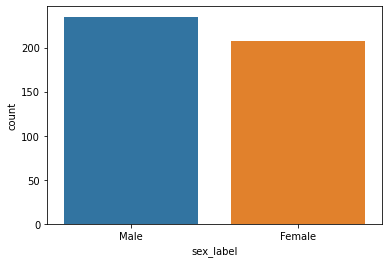

In [11]:
# Count Plot

sns.countplot(x = 'sex_label', data = df)
plt.show()

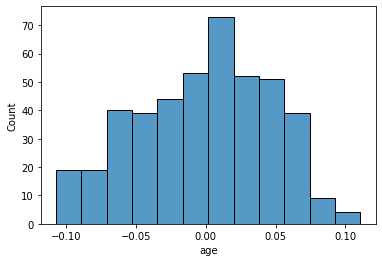

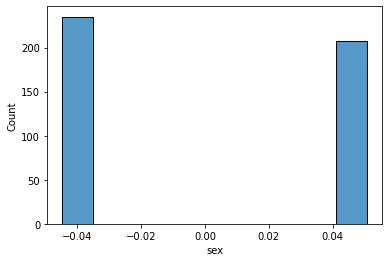

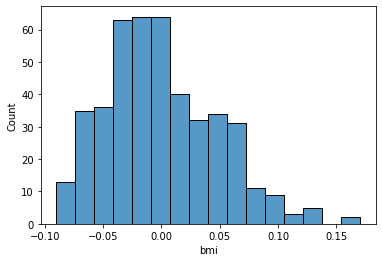

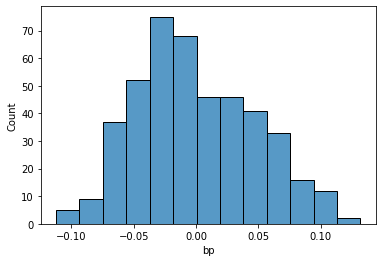

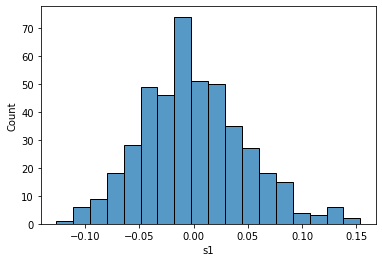

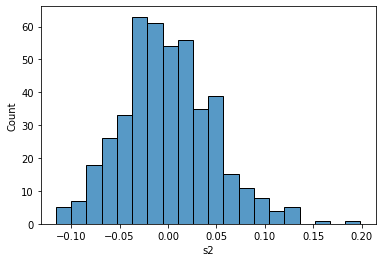

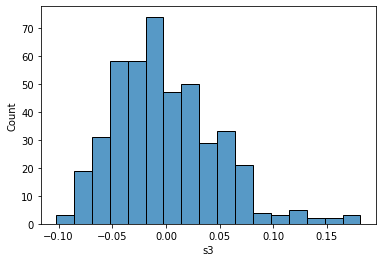

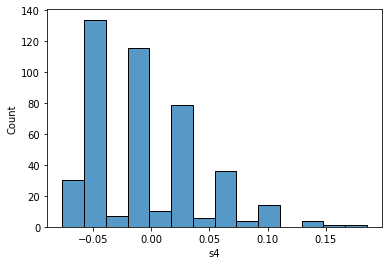

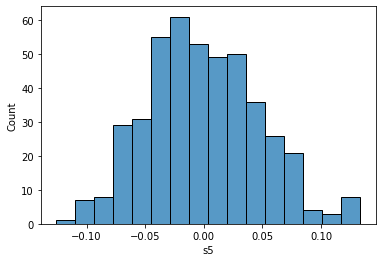

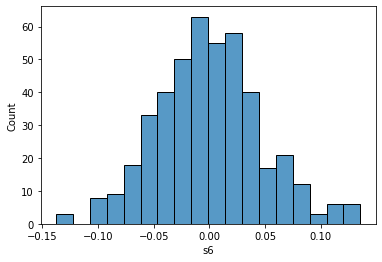

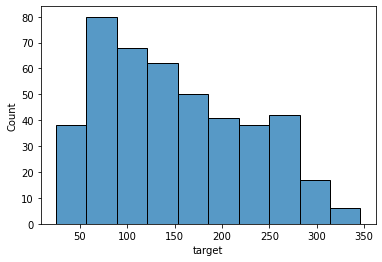

In [12]:
# Histogram

for attr in num_attr:
    sns.histplot(x = attr, data = df)
    plt.show()

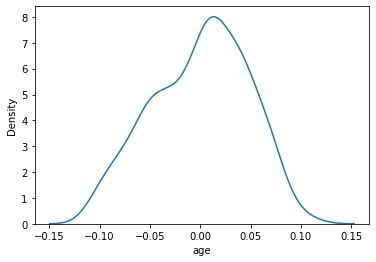

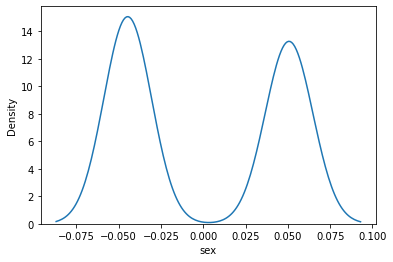

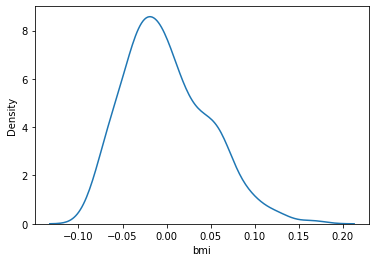

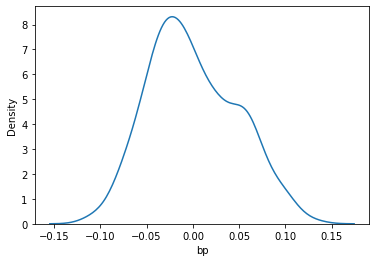

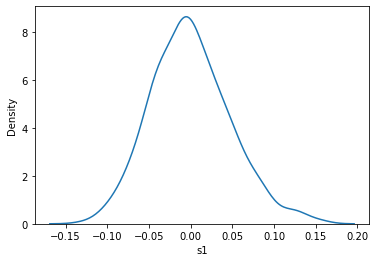

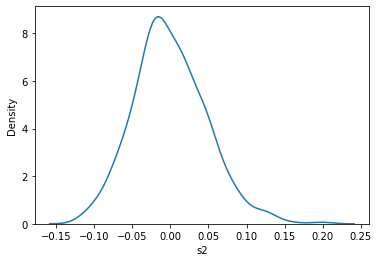

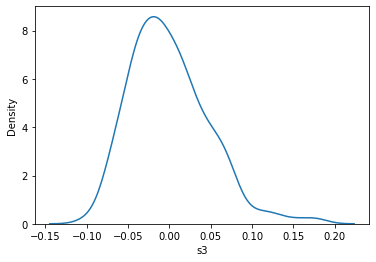

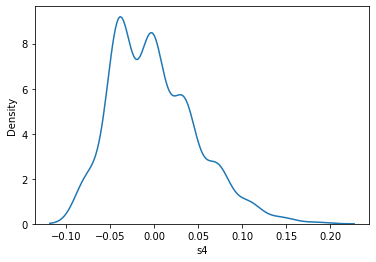

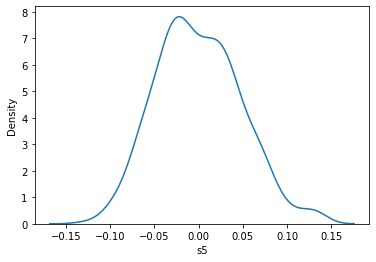

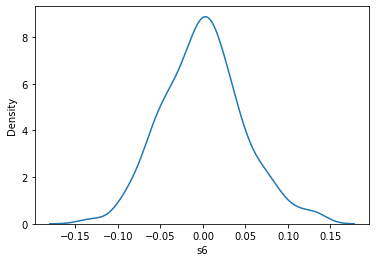

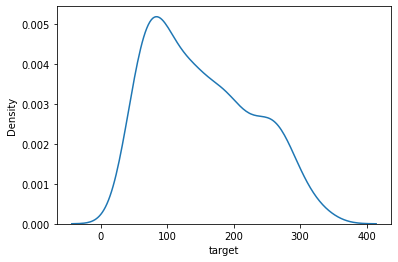

In [13]:
# Kernel Density Plot

for attr in num_attr:
    sns.kdeplot(x = attr, data = df)
    plt.show()

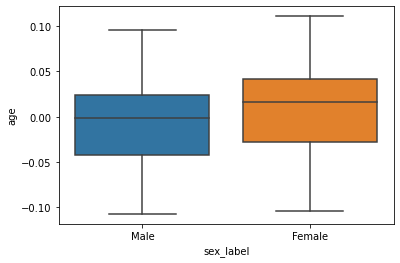

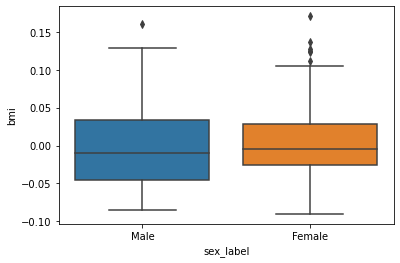

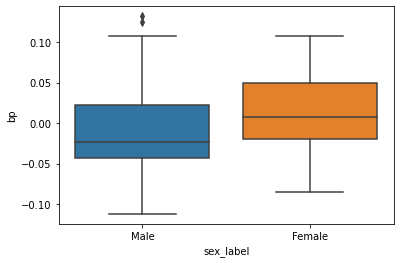

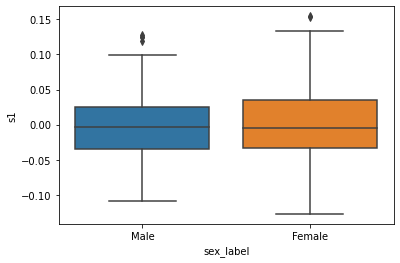

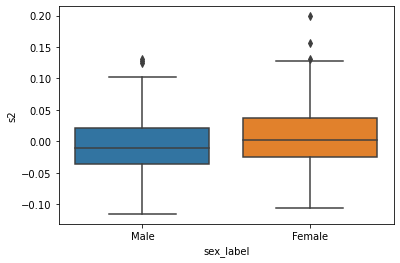

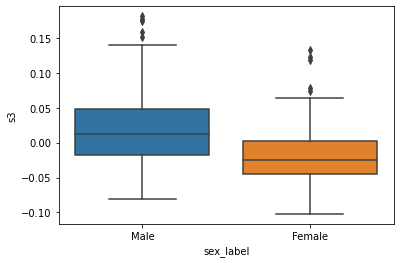

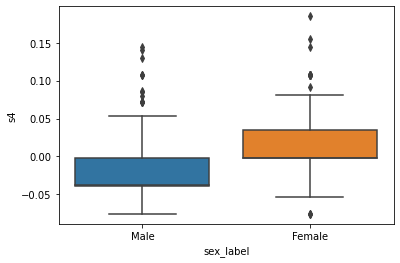

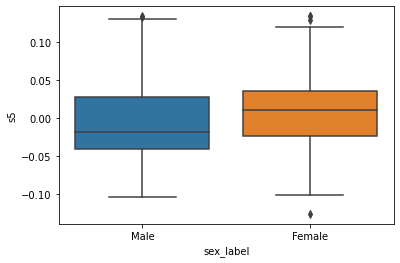

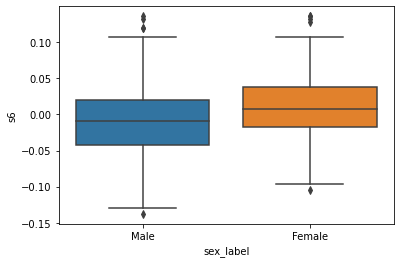

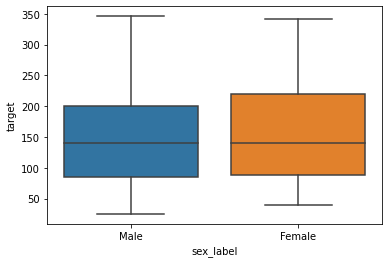

In [14]:
# Box Plot

for attr in num_attr:
    x_ = 'sex_label'
    if (attr != 'sex'):
        sns.boxplot(x = x_, y = attr, data = df)
        plt.show()

### Data Preprocessing and Preparation

In [15]:
X = df.drop(['sex_label', target], axis = 1).values
y = df[target].values

In [16]:
# Stratified Splitting

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_index, test_index in strat_split.split(df, df['sex']):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

In [17]:
print("Size of train set :", y_train.shape[0])
print("Size of test set :", y_test.shape[0])

Size of train set : 353
Size of test set : 89


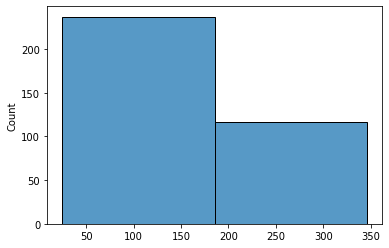

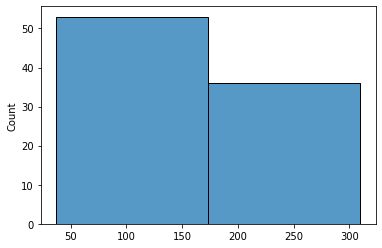

In [18]:
# Checking whether the samples are distributed uniformely

sns.histplot(y_train, bins = len(np.unique(df['sex'])))
plt.show()

sns.histplot(y_test, bins = len(np.unique(df['sex'])))
plt.show()

In [19]:
# Creating a data transformation pipeline for feature scaling

p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
])

In [20]:
# Scaling the features (Standardization)

X_train_scaled = p.fit_transform(X_train)
y_train_scaled = p.fit_transform(y_train.reshape(-1, 1))[:, 0]

X_test_scaled = p.fit_transform(X_test)
y_test_scaled = p.fit_transform(y_test.reshape(-1, 1))[:, 0]

### Training the Model and Evaluating it's Performance

In [21]:
# Implementing Stochastic Gradient Descent from scratch

class SGDRegressor:
    
    def __init__(self, t0 = 5, t1 = 50, n_iter = 100):
        self.t0, self.t1 = t0, t1
        self.n_iter = n_iter
        self.w = self.b = None
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for epoch in range(self.n_iter):
            for i in range(n):
                random_index = np.random.randint(n)
                X_ = X[random_index: random_index + 1]
                y_ = y[random_index: random_index + 1]
                y_pred = np.dot(X_, self.w) + self.b
                dw = np.dot(X_.T, y_pred - y_)
                db = np.sum(y_pred - y_)
                lr = self.learning_schedule(epoch * n + i)
                self.w -= lr * dw
                self.b -= lr * db
    
    def predict(self, X):
        y_pred = np.dot(X, self.w) + self.b
        return y_pred
        
    def learning_schedule(self, t):
        return self.t0 / (t + self.t1)

In [22]:
# Training the Model

reg = SGDRegressor()

reg.fit(X_train_scaled, y_train_scaled)

print(reg.w, reg.b)

[ 0.00831332 -0.16047422  0.34334921  0.16436475 -0.11570558 -0.07189701
 -0.11151168  0.10582264  0.33719888  0.05034986] -0.006164985648994475


In [23]:
y_train_pred = reg.predict(X_train_scaled)

r2 = metrics.r2_score(y_train_scaled, y_train_pred)

print("Train Score :", r2)

Train Score : 0.5166973564252637


#### Sklearn Implementation

In [29]:
# Training the Model

model = linear_model.SGDRegressor()

model.fit(X_train_scaled, y_train_scaled)

SGDRegressor()

In [25]:
y_train_pred = model.predict(X_train_scaled)

r2 = metrics.r2_score(y_train_scaled, y_train_pred)

print("Train Score :", r2)

Train Score : 0.5162940407685848


### Validating the Model

In [28]:
y_test_pred = model.predict(X_test_scaled)

r2 = metrics.r2_score(y_test_scaled, y_test_pred)

print("Test Score :", r2)

Test Score : 0.49849640313143706
